<h1> NETFLIX SHOWS DATASET ANALYSIS

In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('Netflix Shows.csv', encoding = "ISO-8859-1")
data.shape

(1000, 7)

In [6]:
data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


## We could see that most of the items are duplicates

In [10]:
data[data.duplicated(['title'],keep=False)]

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.0,80
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,96.0,80
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,70,2016,98.0,80


## Drop all the duplicates

In [94]:
df = data.drop_duplicates()

In [95]:
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


### The data has the shows released from the year 1989-2004

In [101]:
df['release year'].unique()

array([2004, 2006, 2016, 2008, 2014, 2013, 2017, 2015, 2011, 2009, 2007,
       2012, 2003, 2001, 2010, 1998, 1999, 1978, 2005, 1993, 2002, 1976,
       1989, 1996, 1997, 2000, 1994, 1982, 1990, 1940, 1986, 1995, 1991,
       1992, 1987], dtype=int64)

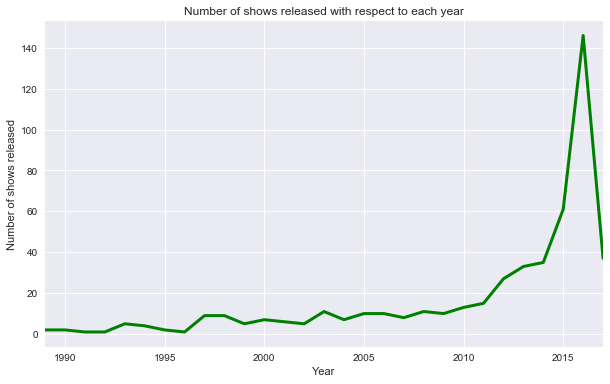

In [102]:
years = df.groupby('release year').size()
plt.figure(figsize=(10,6))
plt.plot(years.index,years.values, color = 'green', linewidth=3)
plt.title('Number of shows released with respect to each year')
plt.xlabel('Year')
plt.ylabel('Number of shows released')
plt.xlim(1989, 2017)
plt.show()

### * The number of shows almost increases every year apart from a few fluctuations. 
### * An exponential increase is seen from the year 2015 to 2016 (We don't have enough data for 2017)

In [103]:
print('Number of shows for families to watch together:',df[(df['ratingLevel']=='Suitable for all ages.') | (df['ratingLevel']=='General Audiences. Suitable for all ages.') ]['title'].count())

Number of shows for families to watch together: 117


In [104]:
print('Number of shows for Children:',df[(df['ratingLevel']=='Suitable for children ages 7 and older') | (df['ratingLevel']=='Suitable for children ages 7 and older.  Content contains fantasy violence.')]['title'].count())

Number of shows for Children: 48


In [105]:
print('Number of unrated shows:',df[(df['ratingLevel']=='NaN') | (df['ratingLevel']=='This movie has not been rated.') ]['title'].count())

Number of unrated shows: 7


###  List of re-released shows

In [116]:
df[df.duplicated(['title'],keep=False)]

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
151,Skins,TV-MA,For mature audiences. May not be suitable for...,110,2013,NaN,82
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,86.0,80
181,Skins,TV-MA,NaN,110,2017,NaN,82
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,110,2016,NaN,82
504,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief langu...",60,2008,57.0,80
512,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,93.0,80
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,41,1998,88.0,80
632,Goosebumps,PG,"scary and intense creature action and images, ...",60,2015,90.0,80


### Goosebumps initially aired from 1998 and was rebooted again in 2015 (It was a scarier version)

In [110]:
best_movies = df[(df['user rating score'] > 90)]['title']
b = best_movies.values
print("THE TOP RATED SHOWS ON NETFLIX ARE:")
for i in range(0,len(b)):
    print(b[i])

THE TOP RATED SHOWS ON NETFLIX ARE:
Grey's Anatomy
Prison Break
How I Met Your Mother
Supernatural
Breaking Bad
The Vampire Diaries
The Walking Dead
Pretty Little Liars
Once Upon a Time
Sherlock
Arrow
The 100
Marvel's Luke Cage
Marvel's Iron Fist
Narcos
The Flash
Girlboss
13 Reasons Why
Sandy Wexler
The Office (U.S.)
Gossip Girl
Parks and Recreation
Glee
Family Guy
Criminal Minds
Friends
Shameless (U.S.)
New Girl
Orange Is the New Black
How to Get Away with Murder
Ingobernable
Zootopia
Finding Dory
Sausage Party
Pete's Dragon
Kevin Hart: What Now?
Chewing Gum
It's Always Sunny in Philadelphia
The Client List
Better Call Saul
The Great British Baking Show
Dave Chappelle
Jane The Virgin
Kubo and the Two Strings
Gilmore Girls
Coraline
The Night Shift
Bones
Law & Order: Special Victims Unit
NCIS
Scandal
Home
Lost
White Collar
House of Cards
The Blacklist
London Has Fallen
Dexter
Hawaii Five-0
Last Man Standing
Person of Interest
Longmire
Blue Bloods
Chicken Little
Star Wars: The Clone Wars

### Latest top rated shows on netflix (According to the given data)

In [115]:
best_movies = df[(df['user rating score'] > 90) & (df['release year'] > 2016)]['title']
b = best_movies.values
print("THE TOP RATED SHOWS ON NETFLIX ARE:")
for i in range(0,len(b)):
    print(b[i])

THE TOP RATED SHOWS ON NETFLIX ARE:
The Vampire Diaries
Marvel's Iron Fist
Girlboss
13 Reasons Why
Sandy Wexler
Ingobernable
Chewing Gum
Dave Chappelle


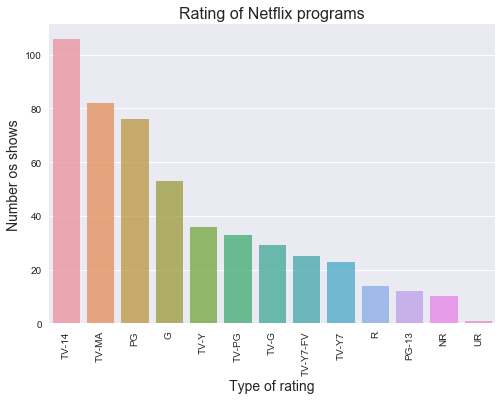

In [120]:
rat = df['rating'].value_counts()
sns.barplot(rat.index, rat.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Type of rating', fontsize=14)
plt.ylabel('Number os shows', fontsize=14)
plt.title("Rating of Netflix programs", fontsize=16)
plt.show()

### Netflix has a lot of TV-14 shows: Programs rated TV-14 may contain some material that parents or adult guardians may find unsuitable for children under the age of 14
### TV-MA: This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. Some content may be unsuitable for children under 17.
### PG: Parental guidance is required for children 
### R : Only for adults
### UR : unrated shows that are yet to be rated

